# AMS 526 Homework 1 
**submitted by Jiaxi Zhao on 16th Sep, 2020**

In this notebook we run some experiments to compare two functions that calculate a matrix-vector product $z = ABx$. They differ by the order they perform the multiplication:
- $ABx = (AB)x$
- $ABx = A(Bx)$


Since the matrix-vector product is associative, both of them obtain the correct result. We compare their efficiency by measuring their running time on problems of different sizes.

## Implementation and test

In [1]:
import numpy as np
from matplotlib import pyplot as plt 
import time

Generate the data: $A, B \in \mathbb{R}^{n \times n}, x \in \mathbb{R}^{n}$ with auxilliary variable $C = AB, y = Bx, z = ABx$.

In [2]:
n   = 100
A   = np.random.rand(n, n)
B   = np.random.rand(n, n)
x   = np.random.rand(n, 1)

1. First method: calculate $ABx = (AB)x$

In [80]:
def Multi1(A, B, x, n):
    "Multiplicative function which multiplies the matrices first"
    C   = np.zeros([n, n])
    z   = np.zeros([n, 1])
    for i in range(n):
        for k in range(n):
            for j in range(n):
                C[i, j] = C[i, j] + A[i, k] * B[k, j]
            
    for i in range(n):
        for j in range(n):
            z[i]        = z[i] + C[i, j] * x[j]
    return z


2. Second method: calculate $ABx = A(Bx)$

In [81]:
def Multi2(A, B, x, n):
    "Multiplicative function which multiplies the matrix and vector first"
    y   = np.zeros([n, 1])
    z   = np.zeros([n, 1])
    for i in range(n):
        for j in range(n):
            y[i]    = y[i] + B[i, j] * x[j]

    for i in range(n):
        for j in range(n):
            z[i]    = z[i] + A[i, j] * y[j]
    return z

A naive comparison of two algorithms

In [86]:
start1  = time.time()
for i in range(1):
    z1  = Multi1(A, B, x, n)        
end1    = time.time()
print("Running time of the function1: ", end1 - start1)

start2  = time.time()
for i in range(1):
    z2  = Multi2(A, B, x, n)       
end2    = time.time()
print("Running time of the function2: ", end2 - start2)
print("Difference between two algorithms: ", sum(abs(z1 - z2)))

Running time of the function1:  0.6556198596954346
Running time of the function2:  0.04465675354003906
Difference between two algorithms:  [4.43378667e-11]


## Analysis of the numbers of floating-point operations

In this part, we theoretically analysis the numbers of floating-point operations of these 2 algorithms. 

Before analyzing two specific algorithms, we first calculate this for a general matric multiplication. Suppose one calculates $C = AB, A \in \mathbb{R}^{m \times n}, B \in \mathbb{R}^{n \times p},C \in  \mathbb{R}^{m \times p}$. Then, for each element of $C$, i.e.
\begin{equation}
    C_{ij} = \sum_{k = 1}^n A_{ik}B_{kj},
\end{equation}
one has to perform $n$ multiplications and $n - 1$ additions. Hence the total numbers of this matrix multiplication is $mp(2n - 1)$. We can use this result to calculate the computational complexity of two algorithms.

We consider the first algorithm which performs the multiplication between matrices firstly, i.e. $C = AB$. It requires $n^2(2n - 1)$ FLOPs to perform this calculation. Then it calculate $z = Cx$ which requires $n(2n - 1)$ FLOPs. The total number of FLOP is thus $n(n + 1)(2n - 1) = \Theta(n^3)$.

For the second algorithm, it contains two same size matrix-vector calculations, i.e. $y = Bx, z = Ay$. Therefore, the total number of FLOP is thus $2n(2n - 1) = \Theta(n^2)$.

***Conclusion:*** It can be summarized that the second algorithm outperforms the first one especially in the large-size problem, i.e. $n \gg 1$ since it has lowew-order complexity,

## Numerical experiments
We compare the performance of two algorithms on problems of difference sizes. The running time is obtained under several repeated experiments and taking the average. 

In [103]:
n_arr   = [50, 100, 200, 400, 800]
t_arr   = np.zeros([5, 2])

for i in range(5):
    n   = n_arr[i];
    it1 = int(800 / n)
    it2 = int(8000 / n)
    A   = np.random.rand(n, n)
    B   = np.random.rand(n, n)
    x   = np.random.rand(n, 1)
    
    start1      = time.time()
    for j in range(it1):
        z       = Multi1(A, B, x, n)
    end1        = time.time()
    t_arr[i, 0] = - (start1 - end1) / it1
    start2      = time.time()
    for j in range(it2):
        z       = Multi2(A, B, x, n)
    end2        = time.time()
    t_arr[i, 1] = - (start2 - end2) / it2

We first directly plot the running times of two algorithms under different problem sizes. Notice that when problem size is large, the running time for second algorithm is significantly smaller than that of the first algorithm, so we also plot the log-figure of running times.

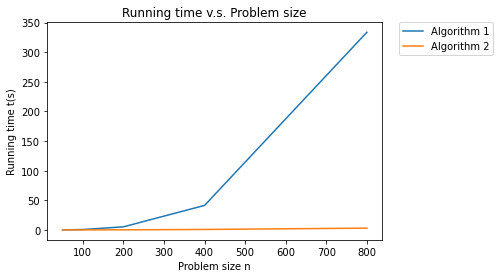

In [116]:
plt.title("Running time v.s. Problem size") 
plt.xlabel("Problem size n") 
plt.ylabel("Running time t(s)") 
plt.plot(n_arr, t_arr[:,0], label = "Algorithm 1")
plt.plot(n_arr, t_arr[:,1], label = "Algorithm 2") 
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', borderaxespad = 0.)
plt.show()

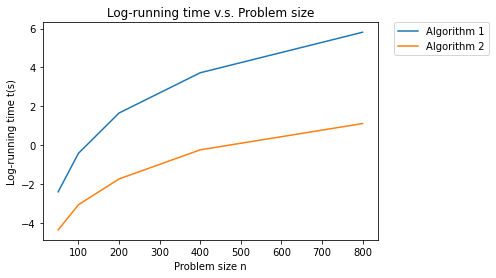

In [120]:
plt.title("Log-running time v.s. Problem size") 
plt.xlabel("Problem size n") 
plt.ylabel("Log-running time t(s)") 
plt.plot(n_arr, np.log(t_arr[:,0]), label = "Algorithm 1") 
plt.plot(n_arr, np.log(t_arr[:,1]), label = "Algorithm 2") 
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', borderaxespad = 0.)
plt.show()

To further explore the connection between numerical experiments and theoretic analysis in previous part, we plot the ratio between the empirical running times and theoretic running times under different problem sizes.

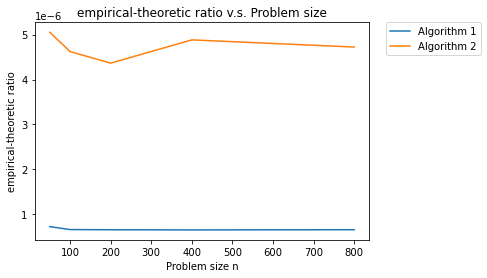

In [121]:
theo    = np.zeros([5, 2])
for i in range(5):
    theo[i, 0]    = n_arr[i] ** 3
    theo[i, 1]    = n_arr[i] ** 2
    
plt.title("empirical-theoretic ratio v.s. Problem size") 
plt.xlabel("Problem size n") 
plt.ylabel("empirical-theoretic ratio") 
plt.plot(n_arr, t_arr[:, 0] / theo[:, 0], label = "Algorithm 1")
plt.plot(n_arr, t_arr[:, 1] / theo[:, 1], label = "Algorithm 2") 
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', borderaxespad = 0.)
plt.show()

\begin{remark}
    It can be conclude from the above figure that the ratio remains nearly constant under different problem sizes. This is a solid evidence that supports our theoretic analysis on number of FLOP. However, one interesting question here is that: the ratio of two algorithms are different from the figure. Further efforts can be made to explain this phenomenon.
\end{remark}

One can also compare the empirical ratio $\frac{t_1}{t_2}$ of the running times of two algorithms with the theortic ratio $\frac{n(n + 1)(2n - 1)}{2n(2n - 1)} = \frac{n + 1}{2}$ we calculate in the last section.

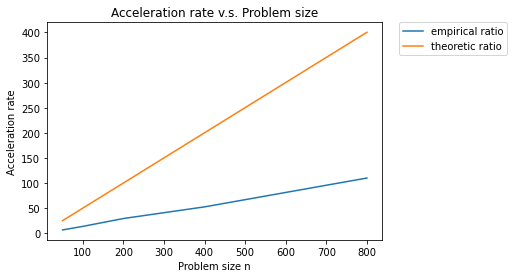

In [115]:
y   = np.zeros([5])
for i in range(5):
    y[i]    = (n_arr[i] + 1)/2
plt.title("Acceleration rate v.s. Problem size") 
plt.xlabel("Problem size n") 
plt.ylabel("Acceleration rate") 
p1  = plt.plot(n_arr, t_arr[:, 0]/t_arr[:, 1], label = "empirical ratio") 
p2  = plt.plot(n_arr, y, label = "theoretic ratio")
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', borderaxespad = 0.)
plt.show()

\begin{remark}
In general, the empirical and theoretic ratio does not coincide, which is another facet of the weird phenomenon we come across in the previous figure. This may caused by some hidden constant on the FLOP.
\end{remark}

## Conclusion
We conduct numerical experiments on two algorithms concerned with matrix-vector product. The numerical results are compared with the theoretic analysis from different perspectives. Although they agree qualitatively on the performance of two algorithms, in a quantitative aspect, the empirical results do not fit well with the theoretic one.